## Daten aus API einlesen
Diesdasananas

Api Dokumentation gemäss: https://doc.iofrog.com/apidocumentation/api.html
Postman requests: https://www.getpostman.com/collections/eb80441a4500fd9a0634

In [3]:
# packages import
import requests
import json
import pandas as pd


Login to api

In [4]:
url = "https://www.iofrog.com/api/v2/auth/signin/"

payload = json.dumps({
  "username": "pascal.berger@students.fhnw.ch",
  "password": "123321"
})
headers = {
  'Content-Type': 'application/json',
  'Cookie': ''
}

login_response = requests.request("POST", url, headers=headers, data=payload)
#print(login_response.text)


In [5]:
login_data = pd.read_json(login_response.text)
access_token = login_data.loc['accessToken', 'token']
login_data

,user,token
firstName,Pascal,NaN
lastName,Berger,NaN
isActivated,True,NaN
level,expert,NaN
partner,heliot,NaN
lang,en,NaN
timeZone,Europe/Berlin,NaN
units,"{'temperature': 'C', 'system': 'M'}",NaN
accessToken,NaN,eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJpZCI6I...
refreshToken,NaN,606595d6d432ff72e837cb31.a8839e00504d5d1c8a99b...


get devices data

In [6]:
url = "https://www.iofrog.com/api/v2/devices/dashboard"

payload = json.dumps([
  {
    "data": [],
    "count": 2,
    "meta": {}
  }
])
headers = {
  'Authorization': 'Bearer ' + access_token,
  'Content-Type': 'application/json',
  'Cookie': ''
}

devices_response = requests.request("GET", url, headers=headers, data=payload)
#print(devices_response.text)


In [7]:
#print(devices_response.text)
#device_data = pd.read_json(devices_response.text)

device_dict = json.loads(devices_response.text)
device_data = pd.DataFrame.from_dict(device_dict['data'])
#device_data = pd.json_normalize(device_dict)
#device_dict['data']
device_data

,id,groupId,name,typeId,modeId,downlinkData,active,location,viewConfig,status,subscriptions,lastSourceBasedLocation,lastDataMessage,trackedKeys,badges
0,2203AAB,60476e95362d421c28ee0058,SimplePack POC_02203AAB TeamA,simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489bab362d421c28f49a02', 'provider...","{'geoplaces': [], '_id': '6059fbafb3ae30315afb...","{'_id': '60659555d432ff72e837c19b', 'keys': [{...",[],[]
1,2203AF9,60476e95362d421c28ee0058,SimplePack POC_02203AF9 TeamA,simple_pack_plus_full_3_0_6_0,NaN,,True,"{'lat': None, 'lng': None}","{'locationSource': 'atlas', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '6050c0467d354e09ee4aa73e', 'provider...",NaN,"{'_id': '60656d924b76c0093a1b27bd', 'keys': [{...",[],[]
2,2203ACB,60476e95362d421c28ee0058,SimplePackPOC_02203ACB TeamB,simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489995362d421c28f48edd', 'provider...","{'geoplaces': [], '_id': '605b68f2f4e46133dc9e...","{'_id': '60658a76eeec4d556624216b', 'keys': [{...",[],[]
3,2203AFA,60476e95362d421c28ee0058,SimplePackPOC_02203AFA TeamB,simple_pack_plus_full_3_0_6_0,press_me,0000000000000788,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489ad5362d421c28f49667', 'provider...","{'geoplaces': [], '_id': '605b4291f4e46133dc9b...","{'_id': '6065900ceeec4d556624f21a', 'keys': [{...",[],[]
4,1F25047,60476e95362d421c28ee0058,SimplePackPTH_01F25047 TeamB\t,simple_pack_plus_full_3_0_6_0,put_me_back,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489b3f362d421c28f498b2', 'provider...","{'geoplaces': [], '_id': '6058b9d703380b4c4fd1...","{'_id': '60659583eeec4d5566256b22', 'keys': [{...",[],[]
5,1F2504E,60476e95362d421c28ee0058,SimplePackPTH_01F2504E TeamA,simple_pack_plus_full_3_0_6_0,NaN,010607880A980F070000000049011707,True,"{'lat': None, 'lng': None}","{'locationSource': 'atlas', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '6050bd897d354e09ee4a5d37', 'provider...",NaN,"{'_id': '606464fd59844218e208b994', 'keys': [{...",[],[]


In [8]:
url = "https://www.iofrog.com/api/v2/devices/2203AAB/messages/"

payload = json.dumps({
  "data": [
    {
      "_id": "1f704bc5-5055-43eb-a851-c87b6b0bf7b9",
      "isAlarm": False,
      "isDismissed": False,
      "timestamp": 1584093653,
      "type": "data_uplink",
      "seqNumber": 1,
      "keys": [
        {
          "isCode": False,
          "_id": "1111111111111111111111",
          "key": "key",
          "value": "value",
          "keyLocale": "Klíč",
          "valueLocale": "Hodnota",
          "color": "alarm",
          "icon": "icon name (from fontAwesome)"
        }
      ]
    }
  ],
  "count": 1
})
headers = {
  'Authorization': 'Bearer ' + access_token,
  'Content-Type': 'application/json',
  'Cookie': ''
}

message_response = requests.request("GET", url, headers=headers, data=payload)

# print(response.text)


In [9]:
# data prep


message_dict = json.loads(message_response.text)
#print(message_dict['data'])
message_data = pd.DataFrame.from_dict(message_dict['data'])

message_data = message_data.drop(columns=['keys'])

message_data_keys = pd.json_normalize(message_dict['data'], record_path='keys', record_prefix='keys_', meta='_id')
message_data_keys = message_data_keys.pivot(index=['_id'], columns='keys_key', values='keys_value')
message_data_keys.reset_index(inplace=True)
message_data_keys = message_data_keys.groupby('_id').sum()
#print(message_data_keys)
# join df's
message_data = message_data.merge(message_data_keys, on=['_id'], how='left', indicator=True)

message_data



,_id,timestamp,type,seqNumber,deviceId,created,__v,action,battery,counter,mode,temperature,_merge
0,60659555d432ff72e837c19b,1617270101,data_bidir,246,2203AAB,2021-04-01T09:41:41.844Z,0,reed_counter,0,378,reed_counter,0,both
1,606593e5d432ff72e837ad71,1617269733,data_bidir,245,2203AAB,2021-04-01T09:35:33.760Z,0,reed_counter,0,376,reed_counter,0,both
2,60658f75eeec4d556624dba3,1617268596,data_bidir,244,2203AAB,2021-04-01T09:16:37.674Z,0,heartbeat_1,3,0,reed_counter,18,both
3,60658cb7eeec4d5566247d6b,1617267893,data_bidir,243,2203AAB,2021-04-01T09:04:55.133Z,0,reed_counter,0,374,reed_counter,0,both
4,60658c79eeec4d5566247472,1617267831,data_bidir,242,2203AAB,2021-04-01T09:03:53.042Z,0,reed_counter,0,373,reed_counter,0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6062f5ea9121604b0bae751e,1617098197,data_bidir,151,2203AAB,2021-03-30T09:56:58.576Z,0,reed_counter,0,274,reed_counter,0,both
96,6062f45f9121604b0bae4360,1617097823,data_bidir,150,2203AAB,2021-03-30T09:50:23.869Z,0,reed_counter,0,273,reed_counter,0,both
97,6062f4209121604b0bae3a8a,1617097759,data_bidir,149,2203AAB,2021-03-30T09:49:20.445Z,0,reed_counter,0,272,reed_counter,0,both
98,6062ed329121604b0bad6193,1617095979,data_bidir,148,2203AAB,2021-03-30T09:19:46.435Z,0,reed_counter,0,271,reed_counter,0,both


C:\Users\Pascal\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\core.py:613: UserWarning: The handle <matplotlib.lines.Line2D object at 0x14264EC8> has a label of '__v' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


<AxesSubplot:>

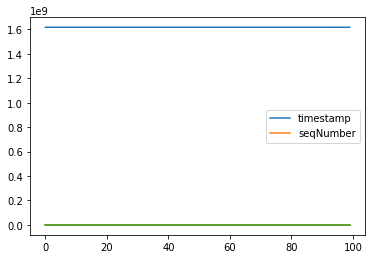

In [15]:
message_data.plot()

drive api (testing still)

In [9]:
# pip install pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

In [11]:
# Rename the downloaded JSON file to client_secrets.json
# The client_secrets.json file needs to be in the same directory as the script.
gauth = GoogleAuth()
drive = GoogleDrive(gauth)
# List files in Google Drive
fileList = drive.ListFile({'q': "'1pxYux33QnFcvrpP17Q88_xY1nW79aJL-' in parents and trashed=false"}).GetList()
# for file1 in fileList:
#   print('title: %s, id: %s' % (file1['title'], file1['id']))

  

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?client_id=491460359726-lj3ilu22ir8ckqnjefot5gs99vmig1d2.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code



In [51]:
fileCons = list()

for file1 in fileList:
  if 'downloadUrl' in file1:
    fileCons.append(requests.get(file1['downloadUrl']).content)
  else:
    print('unsupported file')

unsupported file


In [53]:
print(fileCons)

[b'{\n "error": {\n  "errors": [\n   {\n    "domain": "usageLimits",\n    "reason": "dailyLimitExceededUnreg",\n    "message": "Daily Limit for Unauthenticated Use Exceeded. Continued use requires signup.",\n    "extendedHelp": "https://code.google.com/apis/console"\n   }\n  ],\n  "code": 403,\n  "message": "Daily Limit for Unauthenticated Use Exceeded. Continued use requires signup."\n }\n}\n']
